In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import pytz

from sublimpy import variables
from sublimpy import utils
from sublimpy import tidy

In [2]:
sos_download_dir='~/Development/data/sublimationofsnow/sosnoqc/'
output_dir='~/Development/data/sublimationofsnow/pysumma_inputs/'
output_dir='~/Development/data/sublimationofsnow/pysumma_inputs/'
DATE_FORMAT_STR = '%Y%m%d'
start_date = '20221020'
end_date = '20230601'

In [3]:
datelist = pd.date_range(
    dt.datetime.strptime(start_date, DATE_FORMAT_STR),
    dt.datetime.strptime(end_date, DATE_FORMAT_STR),
    freq='d'
).strftime(DATE_FORMAT_STR).tolist()

In [4]:
VARIABLE_NAMES = [
    'P_10m_c', 'T_3m_c', 'RH_3m_c', 'spd_3m_c',  'Rsw_in_9m_d','Rsw_in_uw', 'LWin', 'LWin_uw',
        # Downward Facing Longwave Radiometer (tower D) - for measuring snow surface temperature
    'Rpile_out_9m_d',
    'Tcase_out_9m_d',
    
    # Upward Facing Longwave Radiometer (tower D)
    'Rpile_in_9m_d',
    'Tcase_in_9m_d',
    
    # Upward facing shortwave radiometer (tower D) - for measuring incoming solar radiation!
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',

    'Tcase_uw',
    'Rpile_in_uw', 'Rpile_out_uw',

    # Snow Pillow SWE
    'SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c',

    # Apogee infrared surface temperature sensors
    "Vtherm_c", "Vtherm_d", "Vtherm_ue", "Vtherm_uw", 
    "Vpile_c", "Vpile_d", "Vpile_ue", "Vpile_uw",
    "IDir_c", "IDir_d", "IDir_ue", "IDir_uw",

    'w_h2o__3m_c',
    'w_h2o__5m_c',

    'w_tc__3m_c',
    'w_tc__5m_c',   
]

In [5]:
sos_ds = utils.download_sos_data(start_date, end_date, VARIABLE_NAMES, sos_download_dir, cache=True, planar_fit=False)

Caching...skipping download for 20221020
Caching...skipping download for 20221021
Caching...skipping download for 20221022
Caching...skipping download for 20221023
Caching...skipping download for 20221024
Caching...skipping download for 20221025
Caching...skipping download for 20221026
failed on 20230422, skipping
failed on 20230423, skipping


In [6]:
sos_ds = variables.add_longwave_radiation(sos_ds)

In [7]:
sos_ds = variables.add_surface_temps(sos_ds)

/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/elischwat/miniforg

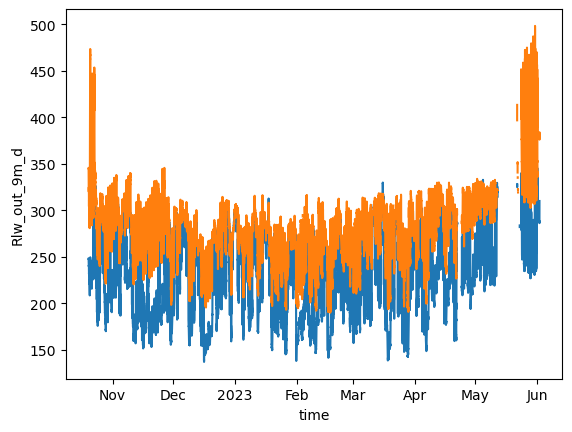

In [8]:
sos_ds['Rlw_in_9m_d'].plot()
sos_ds['Rlw_out_9m_d'].plot()


# Add Tilden precip data

In [11]:
precip_data = pd.concat([
    pd.read_csv("~/Development/data/sublimationofsnow/tilden_precip_data/KP22_274-365.PRECIP1", delim_whitespace=True),
    pd.read_csv("~/Development/data/sublimationofsnow/tilden_precip_data/KP23_001-177.PRECIP1", delim_whitespace=True)
])
precip_data['time'] = precip_data.apply(lambda row: row['date'] + ' ' + row['time(MST)'], axis=1)
precip_data['time'] = pd.to_datetime(precip_data['time'])
precip_data['time'] = precip_data['time'].apply(lambda t: t - dt.timedelta(minutes=30))
precip_data = precip_data.set_index('time')['Precip_mm']
precip_data

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_40076/2208258338.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv("~/Development/data/sublimationofsnow/tilden_precip_data/KP22_274-365.PRECIP1", delim_whitespace=True),
/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_40076/2208258338.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv("~/Development/data/sublimationofsnow/tilden_precip_data/KP23_001-177.PRECIP1", delim_whitespace=True)


time
2022-10-01 00:00:00    0.0
2022-10-01 00:30:00    0.0
2022-10-01 01:00:00    0.0
2022-10-01 01:30:00    0.0
2022-10-01 02:00:00    0.0
                      ... 
2023-06-26 21:30:00    0.0
2023-06-26 22:00:00    0.0
2023-06-26 22:30:00    0.0
2023-06-26 23:00:00    0.0
2023-06-26 23:30:00    0.0
Name: Precip_mm, Length: 12912, dtype: float64

In [12]:
idx = precip_data.resample('5Min').asfreq().index
precip_data = precip_data.reindex(precip_data.index.union(idx)).resample('5Min').asfreq()
precip_data = precip_data.reset_index()
precip_data['time'] = precip_data['time'].apply(lambda t: t + dt.timedelta(minutes=2, seconds=30))
precip_data = precip_data.set_index('time')
precip_data = precip_data.to_xarray()
sos_ds['precip_mm'] = precip_data.sel(time = slice(
    sos_ds.time.min(), sos_ds.time.max()
))['Precip_mm']

# Check data

In [13]:
sos_ds['precip_mm_cum'] = sos_ds['precip_mm'].cumsum()

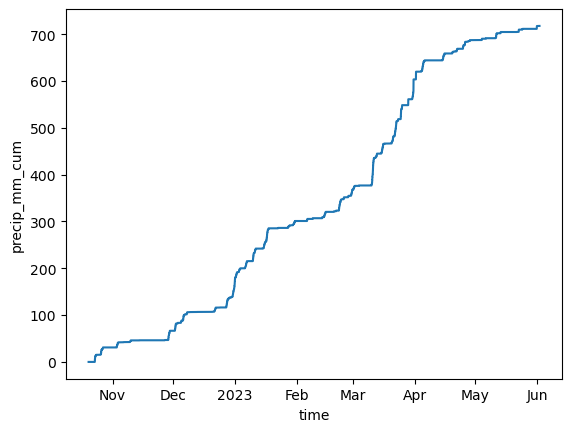

In [14]:
sos_ds['precip_mm_cum'].plot()

# Save Datasets

In [15]:
sos_ds.to_netcdf(
    os.path.join(output_dir ,"kettleponds_sos_pysumma_inputs_5min.cdf")
)
sos_ds.resample(time='30min').mean().to_netcdf(
    os.path.join(output_dir ,"kettleponds_sos_pysumma_inputs_30min.cdf")
)

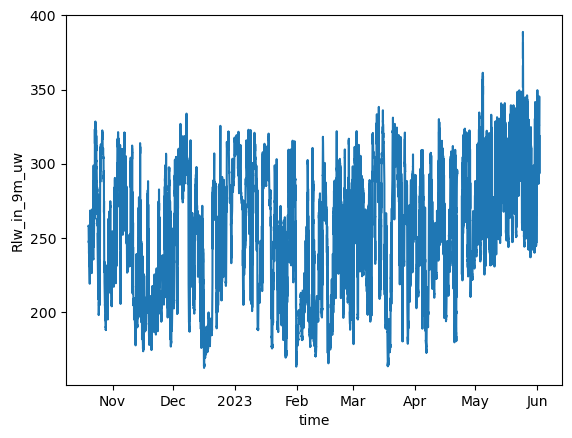

In [19]:
sos_ds['Rlw_in_9m_uw'].plot()